In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('Brickset-Sets-2000.csv', sep = ',')
df2 = pd.read_csv('Brickset-Sets-2001.csv', sep = ',')
df3 = pd.read_csv('Brickset-Sets-2002.csv', sep = ',')
df4 = pd.read_csv('Brickset-Sets-2003.csv', sep = ',')
df5 = pd.read_csv('Brickset-Sets-2004.csv', sep = ',')
df6 = pd.read_csv('Brickset-Sets-2005.csv', sep = ',')
df7 = pd.read_csv('Brickset-Sets-2006.csv', sep = ',')
df8 = pd.read_csv('Brickset-Sets-2007.csv', sep = ',')
df9 = pd.read_csv('Brickset-Sets-2008.csv', sep = ',')
df10 = pd.read_csv('Brickset-Sets-2009.csv', sep = ',')
df11 = pd.read_csv('Brickset-Sets-2010.csv', sep = ',')
df12 = pd.read_csv('Brickset-Sets-2011.csv', sep = ',')
df13 = pd.read_csv('Brickset-Sets-2012.csv', sep = ',')
df14 = pd.read_csv('Brickset-Sets-2013.csv', sep = ',')
df15 = pd.read_csv('Brickset-Sets-2014.csv', sep = ',')
df16 = pd.read_csv('Brickset-Sets-2015.csv', sep = ',')
df17 = pd.read_csv('Brickset-Sets-2016.csv', sep = ',')
df18 = pd.read_csv('Brickset-Sets-2017.csv', sep = ',')
df19 = pd.read_csv('Brickset-Sets-2018.csv', sep = ',')
df20 = pd.read_csv('Brickset-Sets-2019.csv', sep = ',')
df21 = pd.read_csv('Brickset-Sets-2020.csv', sep = ',')
df22 = pd.read_csv('Brickset-Sets-2021.csv', sep = ',')
df23 = pd.read_csv('Brickset-Sets-2022.csv', sep = ',')
df24 = pd.read_csv('Brickset-Sets-2023.csv', sep = ',')

data = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24]

In [4]:
concatenated_df = pd.concat(data, ignore_index=True) #złączenie wszystkich wczytanych danych

selected_columns_df = concatenated_df[['Theme', 'Set name', 'Pieces']] #pozostawienie tylko 3 wybranych kolumn

filtered_df = selected_columns_df.query('Theme not in ["Gear", "Collectable Minifigures"]') #wyrzucenie themes które nie posiadają zestawów klocków

sum_of_pieces = filtered_df.groupby('Theme')['Pieces'].sum().reset_index() #sumowanie wszystkich elementów według tematów
sum_of_pieces['Pieces'] = sum_of_pieces['Pieces'].astype(int) #zamiana sum na liczby całkowite

sum_of_pieces

,Theme,Pieces
0,4 Juniors,1140
1,Action Wheelers,197
2,Advanced models,60947
3,Adventurers,4510
4,Agents,5639
...,...,...
135,Vikings,2827
136,Western,1187
137,World City,7906
138,World Racers,2443


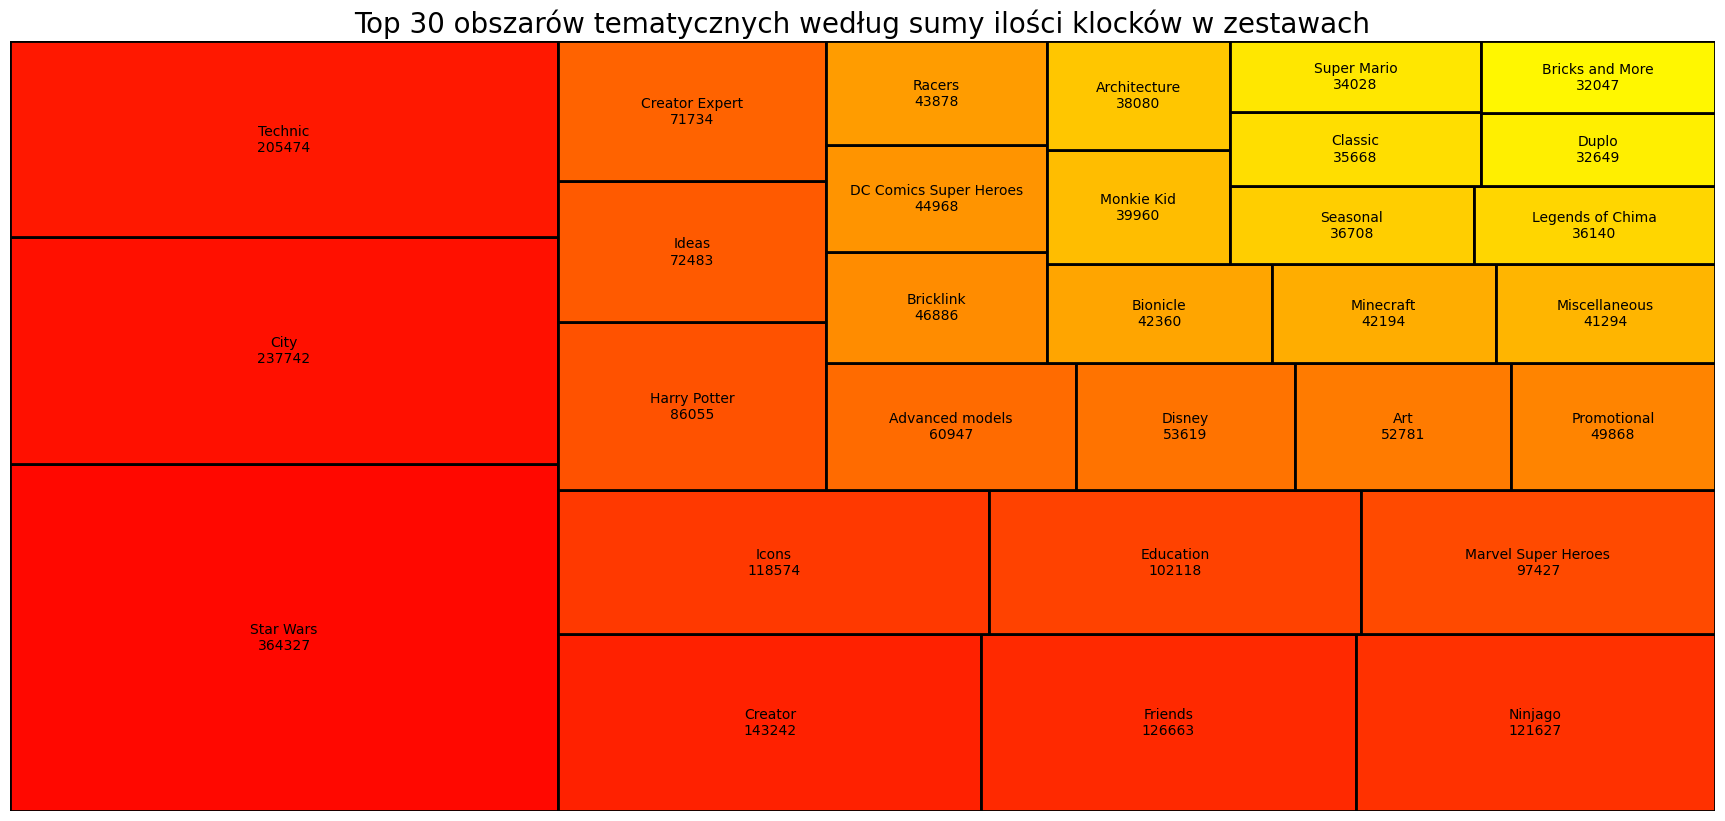

In [5]:
top_30_themes = sum_of_pieces.sort_values(by='Pieces', ascending=False).head(30) #wybór 30 tematów z największą ilością klocków
colors = sns.color_palette("autumn", n_colors=len(top_30_themes)) #ustalanie koloru dla każdego tematu

plt.figure(figsize=(22, 10))

squarify.plot(
    sizes=top_30_themes['Pieces'],
    label=top_30_themes.apply(lambda x: f'{x["Theme"]}\n{x["Pieces"]}', axis=1),
    edgecolor='black',
    linewidth=2,
    color=colors)

plt.axis('off')
plt.title('Top 30 obszarów tematycznych według sumy ilości klocków w zestawach', fontsize=20)

plt.savefig('najwieksze obszary tematyczne na podstawie ilosci klockow.pdf')
plt.show()